# Python实现多元线性回归

# 1 线性回归介绍 

线性回归是利用数理统计中的回归分析，来确定两种或两种以上变量相互依赖的定量关系的一种统计分析方法。其表达形式为：**$$y=w'x+e$$**

其中$e$为误差服从均值为0的正太分布。回归分析中，只包括一个自变量和一个因变量，且二者关系可以用一条直线表示，这种回归分析称为一元线性回归分析。如果回归分析包括两个或两个以上自变量，且因变量和自变量之间是线性关系，则称为多元线性回归分析。

线性回归属于回归问题。对于回归问题，解决流程为：
- **给定数据集中每个样本及其正确答案，选择一个函数模型$h$(hypothesis，假设)。**
- **为$h$找到适应数据（未必是全局）的最优解，即找出最优解下$h$的参数。**
- **给定的数据集取名叫做训练集（Training Set），不能拿所有数据来训练，要保留一部分数据来验证模型。**

几个典型的回归模型：
- **一元线性回归：$$h(x)=\theta_{0}+\theta_{1}x_{1}$$**
- **多变量线性回归：$$h(x)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}$$**
- **多项式回归：$$h(x)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}^2+\theta_{3}x_{3}^3$$**但是可以令$x_{2}=x_{2}^2$，$x_{3}=x_{3}^3$，于是又转化为线性回归模型。虽然不能说多项式回归问题属于线性回归问题，但是一般都是这样处理的。
- **通用表达式：$$h_{\theta }(x)=\theta ^{T}X=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdot \cdot \cdot +\theta_{n}x_{n}$$**

# 2 数据处理

### 2.1 数据处理和可视化准备

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

利用pandas进行数据处理，matplotlib进行可视化，sklearn进行数据集的训练和模型导入。

### 2.2 简单线性回归

对于学生来说，学习时间和考试成绩挂钩，所以学习时间与考试成绩是线性相关的。将如下数据作为数据集：

In [8]:
# 导入学习时间和考试成绩作为数据级
student_score=pd.read_csv('./data/lnregression/student.csv')
student_score.head()

,学习时间,分数
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


#### 2.2.1 特征值和相关系数

上述数据可以看到数据集的**特征值**和**标签**，学习时间为特征值，分数为通过特征值反应的标签。此案例要通过观测数据来反应学习时间和考试成绩的的情况，通过散点图来简单的观测：

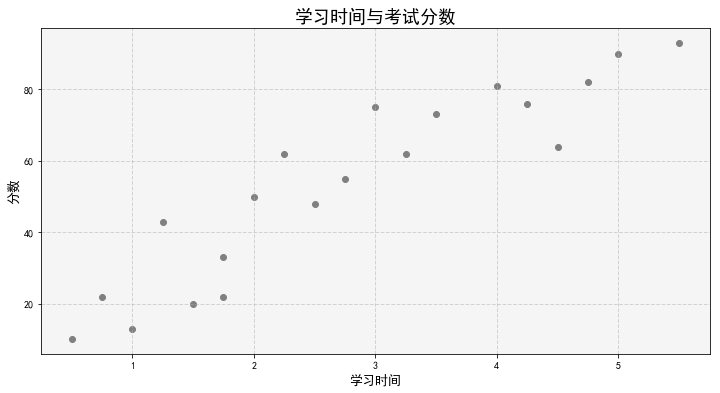

In [12]:
# 画出学习时间和考试成绩的散点图
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('whitesmoke')
plt.scatter(student_score.学习时间, student_score.分数, c='grey', marker='o')
plt.title('学习时间与考试分数', fontsize=18)
plt.xlabel('学习时间', fontsize=13)
plt.ylabel('分数', fontsize=13)
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
plt.show()

从上图可以看书，对学习时间和考试分数来说，存在线性相关性，且量数据的线性相关性较强。在此，可以通过相关性来衡量两个变量因素的相关密切程度。
**相关系数$R$（[相关系数和决定系数的区别](https://www.jianshu.com/p/8aefd78be186)）是衡量两个变量因素相关关系密切程度的指标：$$R=\frac{cov(x,y)}{\sigma_{x}\sigma_{y}}$$**其中$cov(x,y)$为$x$和$y$的协方差。

相关性强度和相关系数的关系：
- **0-0.3：弱相关**
- **0.3-0.6：中等程度相关**
- **0.6-1：强相关**

In [13]:
student_score.corr()

,学习时间,分数
学习时间,1.000000,0.923985
分数,0.923985,1.000000


pandas的数理统计函数**corr()**可以反应数据间的相关性关系。从上表中可以看出学习时间和分数的相关性为强相关（$0.6<0.923<1$）。

对于简单线性回归来说，简单回归方程$y=ax+b$（模型建立最佳拟合线）最佳拟合线需要通过**最小二乘法（使误差平方和最小，即最佳拟合）**来实现其作用。而**误差平方和SSE（Sum Of Square Error）**是实现最小二乘法的基础：$$SSE=\sum (实际值-预测值)^2$$

#### 2.2.2 训练集和测试集

使用**sklearn.model_selection.train_test_split()**函数来创建训练集和测试集。

In [74]:
x_train, x_test, y_train, y_test = train_test_split(student_score['学习时间'], student_score['分数'],train_size=0.8)

In [75]:
print('原始数据特征：', student_score['学习时间'].shape, 
      '，训练数据特征：', x_train.shape,
      '，测试数据特征：', x_test.shape
     )

原始数据特征： (20,) ，训练数据特征： (16,) ，测试数据特征： (4,)


In [76]:
print('原始数据标签：', student_score['分数'].shape,
      '，训练数据标签：', y_train.shape,
      '，测试数据标签：', y_test.shape
     )

原始数据标签： (20,) ，训练数据标签： (16,) ，测试数据标签： (4,)


在一张图中分别画出训练集和测试集的散点图：

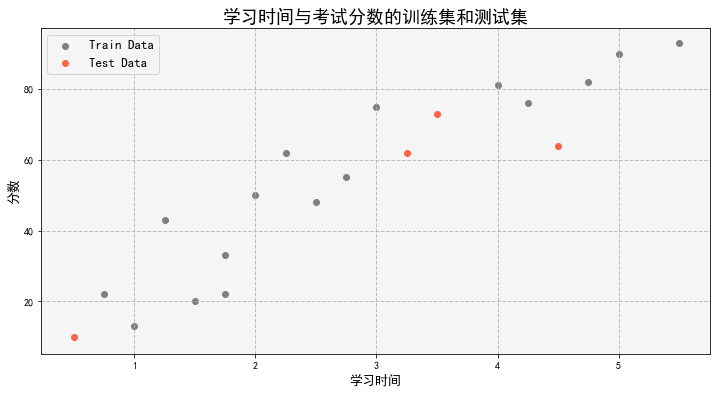

In [77]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('whitesmoke')
plt.scatter(x_train, y_train, c='gray', marker='o', label='Train Data')
plt.scatter(x_test, y_test, c='tomato', marker='o', label='Test Data')
plt.title('学习时间与考试分数的训练集和测试集', fontsize=18)
plt.xlabel('学习时间', fontsize=13)
plt.ylabel('分数', fontsize=13)
plt.grid(linestyle='--', linewidth=1, alpha=0.8)
plt.legend(facecolor='whitesmoke', fontsize=13)
plt.show()

#### 2.2.3 使用模型进行训练

在创建好训练集和测试集后，使用**sklearn.linear_model.LinearRegression（这是一个类）**实例的**fit()**方法对训练集进行训练，从而得到回归系数和截距。

In [78]:
# 初始化模型
model = LinearRegression()

因为model模型的**fit()**方法需要二维数组来进行拟合，如果直接使用x_train，则会提示如下错误：
- Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

所以，最终模型训练如下：

In [79]:
model.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# 获得截距
b = model.intercept_
# 获得回归系数
a = model.coef_
print('最佳拟合线：截距： ', b, '，回归系数： ', a)

最佳拟合线：截距：  8.73768248175 ，回归系数：  [ 16.48175182]


由上述最佳拟合线的截距和回归系数可得其线性回归方程为：$$y=16.48x+8.74$$

#### 2.2.4 模型预测和评估

在进行评估之前，引入**决定系数$R^2$**的概念，其常用于评估模型的精确度。其计算公式为：$$R^2=\frac{SSR}{SST}=1-\frac{SSE}{SST}$$

其中：
- **SST（Total Sum Of Squares）：总平方和（或者叫做$y$的总波动），其计算公式为$SST=\sum (y_{实际值}-y_{平均值})^2$**
- **SSE（Error Sum Of Squares）：残差平方和（或者叫做$y$误差平方和），其计算公式为$SSE=\sum (y_{实际值}-y_{预测值})^2$**
- **SSR（Regression Sum Of Squares）：回归平方和，其计算公式为$SSR=SST-SSE$**
- **$\frac{SSE}{SST}$表示有多少百分比的$y$波动 没有 被回归拟合线所描述**
- **$\frac{SSR}{SST}$即$R^2$表示有多少百分比的$y$波动被回归拟合线所描述**

对于决定系数$R^2$来说：
- **回归线拟合程度：有多少百分比的$y$波动由回归拟合线（$x$波动）来描述**
- **$R^2$值越大（取值范围为$(0,1)$），回归模型的精确度越高。1表示无误差，0表示无法拟合**

最后画出拟合线，并求出决定系数$R^2$。

先求出训练集的预测值：

In [81]:
# 求出训练集的预测值
y_train_pred = model.predict(x_train.values.reshape(-1, 1))

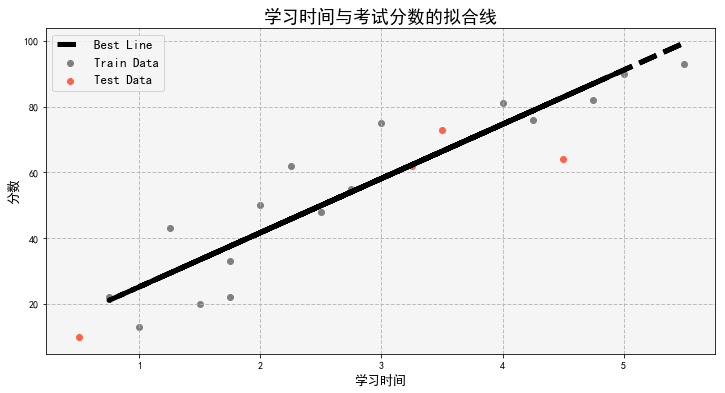

In [82]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('whitesmoke')
plt.scatter(x_train, y_train, c='gray', marker='o', label='Train Data')
plt.scatter(x_test, y_test, c='tomato', marker='o', label='Test Data')
plt.plot(x_train, y_train_pred, '--', color='black', linewidth=5, label='Best Line')
plt.title('学习时间与考试分数的拟合线', fontsize=18)
plt.xlabel('学习时间', fontsize=13)
plt.ylabel('分数', fontsize=13)
plt.grid(linestyle='--', linewidth=1, alpha=0.8)
plt.legend(facecolor='whitesmoke', fontsize=13)
plt.show()

最后用**测试集**求出决定系数$R^2$:

In [83]:
score = model.score(x_test.values.reshape(-1, 1), y_test)
score

0.81645372029476027

由上可知，决定系数$R^2=0.82$，表示由82%的$y$波动由拟合线表示，说明模型拟合度很高。

### 2.3 多元线性回归

有一份描述一个产品的销量和其广告媒体投入的影响，名为**Advertising.csv**。现要通过不同广告投入来预测产品销量。

In [84]:
adv_data = pd.read_csv('./data/lnregression/Advertising.csv')
adv_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


剔除第一列不需要的数据，将剩余数据作为分析数据：

In [86]:
new_adv_data = adv_data.iloc[:, 1:]
new_adv_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


通过上述数据可以得到数据中
- **标签值（sales）：**
    - Sales：对应产品的销量
- **特征值（TV、radio、newspaper）：**
    - TV：对于一个给定市场中的单一产品，用于电视上的广告费用（以千为单位）
    - radio：在广播媒体上投资的广告费用
    - newspaper：在报纸媒体上投资的广告费用

在此案例中，通过不同广告比例投入，预测产品销量。因为响应变量是一个连续值，所以此问题是一个回归问题。

每一行记录代表一组观测值，每一组观测值表示一个市场情况。接下来对数据进行描述统计，以寻找缺失值（缺失值对模型的影响较大，若发现缺失值应删除或者替换），然后利用箱线图从可视化的角度来观察数据是否存在异常值。最后再对数据进行相关性分析，以此来查找数据中特征值与标签值的关系。

#### 2.3.1 数据的描述统计

In [90]:
new_adv_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


通过上表观察得知，**newspaper**数据右偏，可能存在极值，查看数据是否存在缺失值，再用箱线图进行观察：

In [93]:
# 缺失值检验
new_adv_data[new_adv_data.isnull()==True].count()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

由上述结果可知，数据中不存在缺失值，接下来画出数据的箱线图：

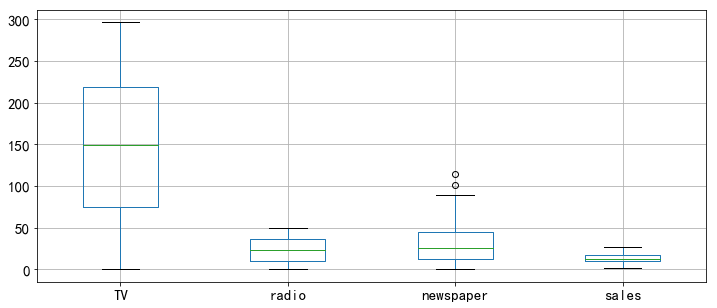

In [100]:
# 数据的箱线图
new_adv_data.boxplot(fontsize=15, figsize=(12, 5))

由上述箱线图可知，newspaper确实存在极值，可以将极值剔除或者将极值用拉格朗日插值法进行替换来避免影响模型精度（此处先不做处理）

接下来观察数据的相关性，用**corr()**函数得到数据之间的相关性矩阵：

In [101]:
# 数据相关性举证
new_adv_data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


由上表可知，**特征变量TV和标签sales强相关（$0.6<0.78<1$）；特征变量radio和标签sales强相关（0.58接近0.6）；特征变量newspaper和标签sales弱相关（$0<0.23<0.3$）。**

接下来建立散点图来看数据里的数据分析情况以及数据线性情况，将使用seaborn包的pariplot()方法来绘制三种不同因素对标签的影响。

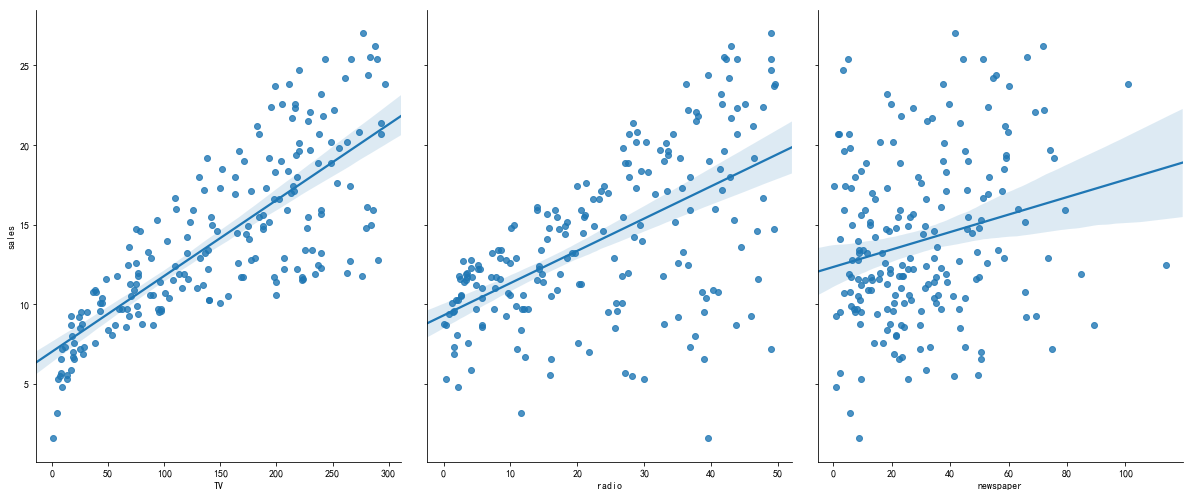

In [105]:
sn.pairplot(new_adv_data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.8, kind='reg')

通过加入一个参数**kind='reg'**，seaborn可以添加一条最佳拟合直线和一个95%的置信带。

通过上图，不同因素对销量的预测线（置信度为95%），也可大致看出不同的特征值对于标签值的影响与相关关系。

#### 2.3.2 训练集和测试集

使用sklearn.model_selection.train_test_split()函数来创建训练集和测试集。

In [106]:
x_train, x_test, y_train, y_test = train_test_split(new_adv_data.iloc[:, 0:3], new_adv_data.sales, train_size=0.8)

In [107]:
print('样本特征值：', new_adv_data.iloc[:, 0:3].shape,
      '训练特征值：', x_train.shape,
      '测试特征值：', x_test.shape
     )

样本特征值： (200, 3) 训练特征值： (160, 3) 测试特征值： (40, 3)


In [108]:
print('样本标签值：', new_adv_data.sales.shape,
      '训练标签值：', y_train.shape,
      '测试标签值：', y_test.shape
     )

样本标签值： (200,) 训练标签值： (160,) 测试标签值： (40,)


#### 2.3.3 使用模型进行训练

在创建好训练集和测试集后，使用**sklearn.linear_model.LinearRegression（这是一个类）**实例的fit()方法对训练集进行训练，从而得到回归系数和截距。

In [109]:
# 创建模型
model = LinearRegression()

In [110]:
#进行训练
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
# 获取回归系数
a = model.coef_
a

array([ 0.04573603,  0.18690213, -0.00039191])

In [112]:
# 获取截距
b = model.intercept_
b

2.8842429445186752

In [113]:
print('最佳拟合线的截距：', b, '，回归系数：', a)

最佳拟合线的截距： 2.88424294452 ，回归系数： [ 0.04573603  0.18690213 -0.00039191]


即多元线性回归模型的函数为：$$y=2.88+0.046TV+0.187radio-0.0004newspaper+2.884$$

对于给定的radio和newspaper，在TV上没多投一个单位，对应的销量将增加0.046个单位，即在TV广告上每投入1000美元，销量将增加47.11。**这里newspaper的系数为负，可以不考虑这个特征值**。接下来对数据集进行预测和评估。

#### 2.3.4 模型预测和评估

用测试集来进行预估，并决定系数$R^2$来评估模型。

In [115]:
score = model.score(x_test, y_test)
score

0.95006619107883006

由上可知决定系数$R^2=0.95$，说明模型的精度非常高。接下来用测试集进行预测：

In [116]:
y_test_pred = model.predict(x_test)

将测试集的标签值和预测标签值在同一张图上做折线图进行观察：

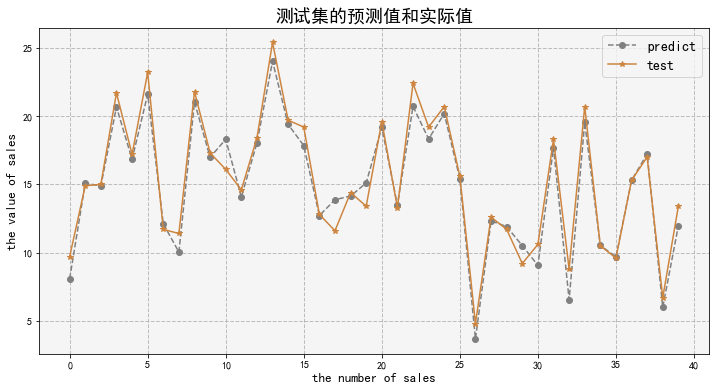

In [129]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('whitesmoke')
plt.plot(range(len(y_test_pred)), y_test_pred, '--o', color='gray', label='predict')
plt.plot(range(len(y_test_pred)), y_test, '-*', color='peru', label='test')
plt.title('测试集的预测值和实际值', fontsize=18)
plt.xlabel('the number of sales', fontsize=13)
plt.ylabel('the value of sales', fontsize=13)
plt.grid(linestyle='--', linewidth=1, alpha=0.8)
plt.legend(facecolor='whitesmoke', fontsize=14)
plt.show()

由上图可知，测试集的预测值和实际值基本吻合，所以该模型精度很高。